In [1]:
!pip install PyQt5 PyQtWebEngine
!pip install gdown
!pip install orange3

In [2]:
import Orange

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import gmean, hmean, trim_mean
import gdown

Importing dataset in Pandas

In [4]:
urlchess="https://bhadri-raj-t.github.io/EDA_DA_23MIA1029/chess_games.csv"
urlpower="https://bhadri-raj-t.github.io/EDA_DA_23MIA1029/powerconsumption.csv"

In [5]:
chess=pd.read_csv(urlchess,index_col=0, on_bad_lines='skip')
power=pd.read_csv(urlpower,index_col=0, on_bad_lines='skip')

#Preprocessing

Check and handle missing values

In [6]:
print("Chess dataset\n")
chess.isnull().sum()

Chess dataset



rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

In [7]:
print("Power consumption dataset\n")
power.isnull().sum()

Power consumption dataset



Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [8]:
chess['opening_response'] = chess['opening_response'].fillna('Unknown')
chess['opening_variation'] = chess['opening_variation'].fillna('Unknown')

Convert to categorical

In [9]:
chess['rated'] = chess['rated'].astype('category')
chess['victory_status'] = chess['victory_status'].astype('category')
chess['winner'] = chess['winner'].astype('category')
chess['rating_difference'] = chess['white_rating'] - chess['black_rating']

Converting datetime column to datetime datatype

In [12]:
power['Datetime'] = pd.to_datetime(power.index)

In [13]:
power['Year'] = power['Datetime'].dt.year
power['Month'] = power['Datetime'].dt.month
power['Day'] = power['Datetime'].dt.day
power['Hour'] = power['Datetime'].dt.hour
power['Minute'] = power['Datetime'].dt.minute

Remove Duplicates

In [14]:
chess = chess.drop_duplicates()
power = power.drop_duplicates()

Saving the preprocessed csv file

In [17]:
chess.to_csv('/content/chess_preprocessed.csv', index=False)
power.to_csv('/content/power_preprocessed.csv', index=False)

#Explore the both datasets

Importing dataset in Orange

In [19]:
chessorg=Orange.data.Table("/content/chess_preprocessed.csv")
powerorg=Orange.data.Table("/content/power_preprocessed.csv")

Identifying the datatypes

In [20]:
print("Dataset Name: ",chessorg.name)
print("Number of Instances:",len(chessorg))
print("Number of Features: ",len(chessorg.domain.attributes))

print("\nFeatures:")
for feature in chessorg.domain.attributes:
    if feature.is_discrete:
        print(f"{feature.name}: Categorical")
    elif feature.is_continuous:
        print(f"{feature.name}: Numerical")
    else:
        print(f"{feature.name}: Unknown data type")

Dataset Name:  chess_preprocessed
Number of Instances: 19112
Number of Features:  9

Features:
rated: Categorical
turns: Numerical
victory_status: Categorical
winner: Categorical
white_rating: Numerical
black_rating: Numerical
opening_moves: Numerical
opening_response: Categorical
rating_difference: Numerical


In [21]:
print("Dataset Name: ",powerorg.name)
print("Number of Instances:",len(powerorg))
print("Number of Features: ",len(powerorg.domain.attributes))

print("\nFeatures:")
for feature in powerorg.domain.attributes:
    if feature.is_discrete:
        print(f"{feature.name}: Categorical")
    elif feature.is_continuous:
        print(f"{feature.name}: Numerical")
    else:
        print(f"{feature.name}: Unknown data type")

Dataset Name:  power_preprocessed
Number of Instances: 52416
Number of Features:  13

Features:
Temperature: Numerical
Humidity: Numerical
WindSpeed: Numerical
GeneralDiffuseFlows: Numerical
DiffuseFlows: Numerical
PowerConsumption_Zone1: Numerical
PowerConsumption_Zone2: Numerical
PowerConsumption_Zone3: Numerical
Year: Numerical
Month: Numerical
Day: Numerical
Hour: Numerical
Minute: Numerical


Head of the dataset

In [22]:
chess.head()

rated  turns victory_status winner time_increment       white_id  \
game_id                                                                     
1        False     13    Out of Time  White           15+2       bourgris   
2         True     16         Resign  Black           5+10           a-00   
3         True     61           Mate  White           5+10         ischia   
4         True     61           Mate  White           20+0  daniamurashov   
5         True     95           Mate  White           30+3      nik221107   

         white_rating      black_id  black_rating  \
game_id                                             
1                1500          a-00          1191   
2                1322     skinnerua          1261   
3                1496          a-00          1500   
4                1439  adivanov2009          1454   
5                1523  adivanov2009          1469   

                                                     moves opening_code  \
game_id                                                                   
1        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...          D10   
2        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...          B00   
3        e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...          C20   
4        d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...          D02   
5        e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...          C41   

         opening_moves                        opening_fullname  \
game_id                                                          
1                    5        Slav Defense: Exchange Variation   
2                    4  Nimzowitsch Defense: Kennedy Variation   
3                    3   King's Pawn Game: Leonardis Variation   
4                    3  Queen's Pawn Game: Zukertort Variation   
5                    5                        Philidor Defense   

           opening_shortname opening_response    opening_variation  \
game_id                                                              
1               Slav Defense          Unknown   Exchange Variation   
2        Nimzowitsch Defense          Unknown    Kennedy Variation   
3           King's Pawn Game          Unknown  Leonardis Variation   
4          Queen's Pawn Game          Unknown  Zukertort Variation   
5           Philidor Defense          Unknown              Unknown   

         rating_difference  
game_id                     
1                      309  
2                       61  
3                       -4  
4                      -15  
5                       54

In [23]:
power.head()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-01-01 00:00:00         0.119             34055.69620   
2017-01-01 00:10:00         0.085             29814.68354   
2017-01-01 00:20:00         0.100             29128.10127   
2017-01-01 00:30:00         0.096             28228.86076   
2017-01-01 00:40:00         0.085             27335.69620   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  Year  \
Datetime                                                                    
2017-01-01 00:00:00             16128.87538             20240.96386  2017   
2017-01-01 00:10:00             19375.07599             20131.08434  2017   
2017-01-01 00:20:00             19006.68693             19668.43373  2017   
2017-01-01 00:30:00             18361.09422             18899.27711  2017   
2017-01-01 00:40:00             17872.34043             18442.40964  2017   

                     Month  Day  Hour  Minute  
Datetime                                       
2017-01-01 00:00:00      1    1     0       0  
2017-01-01 00:10:00      1    1     0      10  
2017-01-01 00:20:00      1    1     0      20  
2017-01-01 00:30:00      1    1     0      30  
2017-01-01 00:40:00      1    1     0      40

Tail of the dataset

In [24]:
chess.tail()

rated  turns victory_status winner time_increment      white_id  \
game_id                                                                   
20054    True     24         Resign  White          10+10       belcolt   
20055    True     82           Mate  Black           10+0      jamboger   
20056    True     35           Mate  White           10+0      jamboger   
20057    True    109         Resign  White           10+0  marcodisogno   
20058    True     78           Mate  Black           10+0      jamboger   

         white_rating            black_id  black_rating  \
game_id                                                   
20054            1691            jamboger          1220   
20055            1233  farrukhasomiddinov          1196   
20056            1219        schaaksmurf3          1286   
20057            1360            jamboger          1227   
20058            1235               ffbob          1339   

                                                     moves opening_code  \
game_id                                                                   
20054    d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...          A80   
20055    d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...          A41   
20056    d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...          D00   
20057    e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...          B07   
20058    d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...          D00   

         opening_moves                 opening_fullname  opening_shortname  \
game_id                                                                      
20054                2                    Dutch Defense      Dutch Defense   
20055                2                     Queen's Pawn       Queen's Pawn   
20056                3  Queen's Pawn Game: Mason Attack  Queen's Pawn Game   
20057                4                     Pirc Defense       Pirc Defense   
20058                3  Queen's Pawn Game: Mason Attack  Queen's Pawn Game   

        opening_response opening_variation  rating_difference  
game_id                                                        
20054            Unknown           Unknown                471  
20055            Unknown           Unknown                 37  
20056            Unknown      Mason Attack                -67  
20057            Unknown           Unknown                133  
20058            Unknown      Mason Attack               -104

In [25]:
power.tail()

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-12-30 23:10:00        7.010      72.4      0.080                0.040   
2017-12-30 23:20:00        6.947      72.6      0.082                0.051   
2017-12-30 23:30:00        6.900      72.8      0.086                0.084   
2017-12-30 23:40:00        6.758      73.0      0.080                0.066   
2017-12-30 23:50:00        6.580      74.1      0.081                0.062   

                     DiffuseFlows  PowerConsumption_Zone1  \
Datetime                                                    
2017-12-30 23:10:00         0.096             31160.45627   
2017-12-30 23:20:00         0.093             30430.41825   
2017-12-30 23:30:00         0.074             29590.87452   
2017-12-30 23:40:00         0.089             28958.17490   
2017-12-30 23:50:00         0.111             28349.80989   

                     PowerConsumption_Zone2  PowerConsumption_Zone3  Year  \
Datetime                                                                    
2017-12-30 23:10:00             26857.31820             14780.31212  2017   
2017-12-30 23:20:00             26124.57809             14428.81152  2017   
2017-12-30 23:30:00             25277.69254             13806.48259  2017   
2017-12-30 23:40:00             24692.23688             13512.60504  2017   
2017-12-30 23:50:00             24055.23167             13345.49820  2017   

                     Month  Day  Hour  Minute  
Datetime                                       
2017-12-30 23:10:00     12   30    23      10  
2017-12-30 23:20:00     12   30    23      20  
2017-12-30 23:30:00     12   30    23      30  
2017-12-30 23:40:00     12   30    23      40  
2017-12-30 23:50:00     12   30    23      50

Shape of the dataset

In [26]:
print("Chess dataset\nNo. of rows =",chess.shape[0]," No. of columns =",chess.shape[1])
print("Power consumption dataset\nNo. of rows =",power.shape[0]," No. of columns =",power.shape[1])

Chess dataset
No. of rows = 19112  No. of columns = 17
Power consumption dataset
No. of rows = 52416  No. of columns = 13


Columns of the dataset

In [27]:
print("Chess dataset")
chess.columns.tolist()

Chess dataset


['rated',
 'turns',
 'victory_status',
 'winner',
 'time_increment',
 'white_id',
 'white_rating',
 'black_id',
 'black_rating',
 'moves',
 'opening_code',
 'opening_moves',
 'opening_fullname',
 'opening_shortname',
 'opening_response',
 'opening_variation',
 'rating_difference']

In [28]:
print("Power consumption dataset")
power.columns.tolist()

Power consumption dataset


['Temperature',
 'Humidity',
 'WindSpeed',
 'GeneralDiffuseFlows',
 'DiffuseFlows',
 'PowerConsumption_Zone1',
 'PowerConsumption_Zone2',
 'PowerConsumption_Zone3',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Minute']

Data types

In [29]:
print("Chess dataset\n")
chess.info()

Chess dataset

<class 'pandas.core.frame.DataFrame'>
Index: 19112 entries, 1 to 20058
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rated              19112 non-null  category
 1   turns              19112 non-null  int64   
 2   victory_status     19112 non-null  category
 3   winner             19112 non-null  category
 4   time_increment     19112 non-null  object  
 5   white_id           19112 non-null  object  
 6   white_rating       19112 non-null  int64   
 7   black_id           19112 non-null  object  
 8   black_rating       19112 non-null  int64   
 9   moves              19112 non-null  object  
 10  opening_code       19112 non-null  object  
 11  opening_moves      19112 non-null  int64   
 12  opening_fullname   19112 non-null  object  
 13  opening_shortname  19112 non-null  object  
 14  opening_response   19112 non-null  object  
 15  opening_variation  19112 non-null  object  

In [30]:
print("Power consumption dataset\n")
power.info()

Power consumption dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
 6   PowerConsumption_Zone2  52416 non-null  float64
 7   PowerConsumption_Zone3  52416 non-null  float64
 8   Year                    52416 non-null  int32  
 9   Month                   52416 non-null  int32  
 10  Day                     52416 non-null  int32  
 11  Hour                    52416 non-null  int32  
 12  Minute                  52416 non-null  int32  
dtypes: float64(8), int32(5)
memor

Description of the dataset

In [31]:
print("Chess dataset")
chess.describe()

Chess dataset


turns  white_rating  black_rating  opening_moves  \
count  19112.000000  19112.000000  19112.000000   19112.000000   
mean      60.516900   1597.339420   1590.050230       4.815927   
std       33.486465    289.979131    290.448563       2.798282   
min        1.000000    784.000000    789.000000       1.000000   
25%       37.000000   1401.000000   1394.000000       3.000000   
50%       55.000000   1567.000000   1563.000000       4.000000   
75%       79.000000   1792.000000   1785.000000       6.000000   
max      349.000000   2700.000000   2723.000000      28.000000   

       rating_difference  
count        19112.00000  
mean             7.28919  
std            247.40114  
min          -1605.00000  
25%           -108.00000  
50%              3.00000  
75%            122.00000  
max           1499.00000

In [32]:
print("Power consumption dataset")
power.describe()

Power consumption dataset


Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.696200             8560.081466   
25%        0.122000            26310.668692            16980.766032   
50%        4.456000            32265.920340            20823.168405   
75%      101.000000            37309.018185            24713.717520   
max      936.000000            52204.395120            37408.860760   

       PowerConsumption_Zone3     Year         Month           Day  \
count            52416.000000  52416.0  52416.000000  52416.000000   
mean             17835.406218   2017.0      6.510989     15.678571   
std               6622.165099      0.0      3.440642      8.771822   
min               5935.174070   2017.0      1.000000      1.000000   
25%              13129.326630   2017.0      4.000000      8.000000   
50%              16415.117470   2017.0      7.000000     16.000000   
75%              21624.100420   2017.0      9.250000     23.000000   
max              47598.326360   2017.0     12.000000     31.000000   

               Hour        Minute  
count  52416.000000  52416.000000  
mean      11.500000     25.000000  
std        6.922253     17.078414  
min        0.000000      0.000000  
25%        5.750000     10.000000  
50%       11.500000     25.000000  
75%       17.250000     40.000000  
max       23.000000     50.000000

Description of Catagorical datatype

In [33]:
categorical_chess = chess.select_dtypes(include=['object', 'bool'])

In [34]:
print("\nChess Dataset Categorical Summary:")
categorical_chess.describe()


Chess Dataset Categorical Summary:


time_increment white_id black_id  moves opening_code  opening_fullname  \
count           19112    19112    19112  19112        19112             19112   
unique            400     9438     9331  18920          365              1477   
top              10+0     ssf7  docboss  e4 e5          A00  Sicilian Defense   
freq             7356       48       44     25          948               349   

       opening_shortname opening_response opening_variation  
count              19112            19112             19112  
unique               128                4               616  
top     Sicilian Defense          Unknown           Unknown  
freq                2526            17956              5396

Unique values in the dataset

In [36]:
for col in chess.columns:
    print(f"{col}: {chess[col].nunique()} unique values")

rated: 2 unique values
turns: 211 unique values
victory_status: 4 unique values
winner: 3 unique values
time_increment: 400 unique values
white_id: 9438 unique values
white_rating: 1516 unique values
black_id: 9331 unique values
black_rating: 1521 unique values
moves: 18920 unique values
opening_code: 365 unique values
opening_moves: 23 unique values
opening_fullname: 1477 unique values
opening_shortname: 128 unique values
opening_response: 4 unique values
opening_variation: 616 unique values
rating_difference: 1577 unique values


In [37]:
for col in power.columns:
    print(f"{col}: {power[col].nunique()} unique values")

Temperature: 3437 unique values
Humidity: 4443 unique values
WindSpeed: 548 unique values
GeneralDiffuseFlows: 10504 unique values
DiffuseFlows: 10449 unique values
PowerConsumption_Zone1: 27709 unique values
PowerConsumption_Zone2: 29621 unique values
PowerConsumption_Zone3: 22838 unique values
Year: 1 unique values
Month: 12 unique values
Day: 31 unique values
Hour: 24 unique values
Minute: 6 unique values


#Apply suitable Non-Graphical techniques (statistical model) and show the step by step illustration with result

##Measure of central tendency

In [38]:
chess_num=chess[['white_rating', 'black_rating', 'turns']]
power_num=power[['Temperature', 'Humidity', 'WindSpeed','PowerConsumption_Zone1', 'PowerConsumption_Zone2','PowerConsumption_Zone3']]

Descriptive Statistics

In [39]:
chess_num.describe()

white_rating  black_rating         turns
count  19112.000000  19112.000000  19112.000000
mean    1597.339420   1590.050230     60.516900
std      289.979131    290.448563     33.486465
min      784.000000    789.000000      1.000000
25%     1401.000000   1394.000000     37.000000
50%     1567.000000   1563.000000     55.000000
75%     1792.000000   1785.000000     79.000000
max     2700.000000   2723.000000    349.000000

In [40]:
chess_num.median()

white_rating    1567.0
black_rating    1563.0
turns             55.0
dtype: float64

In [41]:
chess_num.mode().T

0
white_rating  1500
black_rating  1500
turns           45

In [42]:
power_num.describe()

Temperature      Humidity     WindSpeed  PowerConsumption_Zone1  \
count  52416.000000  52416.000000  52416.000000            52416.000000   
mean      18.810024     68.259518      1.959489            32344.970564   
std        5.815476     15.551177      2.348862             7130.562564   
min        3.247000     11.340000      0.050000            13895.696200   
25%       14.410000     58.310000      0.078000            26310.668692   
50%       18.780000     69.860000      0.086000            32265.920340   
75%       22.890000     81.400000      4.915000            37309.018185   
max       40.010000     94.800000      6.483000            52204.395120   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
count            52416.000000            52416.000000  
mean             21042.509082            17835.406218  
std               5201.465892             6622.165099  
min               8560.081466             5935.174070  
25%              16980.766032            13129.326630  
50%              20823.168405            16415.117470  
75%              24713.717520            21624.100420  
max              37408.860760            47598.326360

In [43]:
power_num.median()

Temperature                  18.780000
Humidity                     69.860000
WindSpeed                     0.086000
PowerConsumption_Zone1    32265.920340
PowerConsumption_Zone2    20823.168405
PowerConsumption_Zone3    16415.117470
dtype: float64

In [44]:
power_num.mode().T

0
Temperature                15.180
Humidity                   85.900
WindSpeed                   0.082
PowerConsumption_Zone1  34560.000
PowerConsumption_Zone2  21600.000
PowerConsumption_Zone3  17280.000

Variance analysis

In [45]:
chess_num.var()

white_rating    84087.896457
black_rating    84360.367630
turns            1121.343338
dtype: float64

In [46]:
power_num.var()

Temperature               3.381976e+01
Humidity                  2.418391e+02
WindSpeed                 5.517152e+00
PowerConsumption_Zone1    5.084492e+07
PowerConsumption_Zone2    2.705525e+07
PowerConsumption_Zone3    4.385307e+07
dtype: float64

Covariance Analysis

In [47]:
chess_num.cov()

white_rating  black_rating        turns
white_rating  84087.896457  53620.470104  1273.334251
black_rating  53620.470104  84360.367630  1555.087425
turns          1273.334251   1555.087425  1121.343338

In [48]:
power_num.cov()

Temperature      Humidity    WindSpeed  \
Temperature                33.819759    -41.623221     6.517185   
Humidity                  -41.623221    241.839112    -4.962395   
WindSpeed                   6.517185     -4.962395     5.517152   
PowerConsumption_Zone1  18254.905891 -31871.680151  2804.471792   
PowerConsumption_Zone2  11568.067496 -23859.110308  1788.809345   
PowerConsumption_Zone3  18852.206311 -23997.145736  4334.129100   

                        PowerConsumption_Zone1  PowerConsumption_Zone2  \
Temperature                       1.825491e+04            1.156807e+04   
Humidity                         -3.187168e+04           -2.385911e+04   
WindSpeed                         2.804472e+03            1.788809e+03   
PowerConsumption_Zone1            5.084492e+07            3.095179e+07   
PowerConsumption_Zone2            3.095179e+07            2.705525e+07   
PowerConsumption_Zone3            3.544946e+07            1.966574e+07   

                        PowerConsumption_Zone3  
Temperature                       1.885221e+04  
Humidity                         -2.399715e+04  
WindSpeed                         4.334129e+03  
PowerConsumption_Zone1            3.544946e+07  
PowerConsumption_Zone2            1.966574e+07  
PowerConsumption_Zone3            4.385307e+07

Correlation Analysis

In [49]:
chess_num.corr()

white_rating  black_rating     turns
white_rating      1.000000      0.636641  0.131131
black_rating      0.636641      1.000000  0.159888
turns             0.131131      0.159888  1.000000

In [50]:
chess_num.corr(method='pearson')

white_rating  black_rating     turns
white_rating      1.000000      0.636641  0.131131
black_rating      0.636641      1.000000  0.159888
turns             0.131131      0.159888  1.000000

In [51]:
chess_num.corr(method='spearman')

white_rating  black_rating     turns
white_rating      1.000000      0.656599  0.140250
black_rating      0.656599      1.000000  0.166722
turns             0.140250      0.166722  1.000000

In [52]:
power_num.corr()

Temperature  Humidity  WindSpeed  \
Temperature                1.000000 -0.460243   0.477109   
Humidity                  -0.460243  1.000000  -0.135853   
WindSpeed                  0.477109 -0.135853   1.000000   
PowerConsumption_Zone1     0.440221 -0.287421   0.167444   
PowerConsumption_Zone2     0.382428 -0.294961   0.146413   
PowerConsumption_Zone3     0.489527 -0.233022   0.278641   

                        PowerConsumption_Zone1  PowerConsumption_Zone2  \
Temperature                           0.440221                0.382428   
Humidity                             -0.287421               -0.294961   
WindSpeed                             0.167444                0.146413   
PowerConsumption_Zone1                1.000000                0.834519   
PowerConsumption_Zone2                0.834519                1.000000   
PowerConsumption_Zone3                0.750733                0.570932   

                        PowerConsumption_Zone3  
Temperature                           0.489527  
Humidity                             -0.233022  
WindSpeed                             0.278641  
PowerConsumption_Zone1                0.750733  
PowerConsumption_Zone2                0.570932  
PowerConsumption_Zone3                1.000000

In [53]:
power_num.corr(method='pearson')

Temperature  Humidity  WindSpeed  \
Temperature                1.000000 -0.460243   0.477109   
Humidity                  -0.460243  1.000000  -0.135853   
WindSpeed                  0.477109 -0.135853   1.000000   
PowerConsumption_Zone1     0.440221 -0.287421   0.167444   
PowerConsumption_Zone2     0.382428 -0.294961   0.146413   
PowerConsumption_Zone3     0.489527 -0.233022   0.278641   

                        PowerConsumption_Zone1  PowerConsumption_Zone2  \
Temperature                           0.440221                0.382428   
Humidity                             -0.287421               -0.294961   
WindSpeed                             0.167444                0.146413   
PowerConsumption_Zone1                1.000000                0.834519   
PowerConsumption_Zone2                0.834519                1.000000   
PowerConsumption_Zone3                0.750733                0.570932   

                        PowerConsumption_Zone3  
Temperature                           0.489527  
Humidity                             -0.233022  
WindSpeed                             0.278641  
PowerConsumption_Zone1                0.750733  
PowerConsumption_Zone2                0.570932  
PowerConsumption_Zone3                1.000000

In [54]:
power_num.corr(method='spearman')

Temperature  Humidity  WindSpeed  \
Temperature                1.000000 -0.378319   0.326034   
Humidity                  -0.378319  1.000000  -0.180655   
WindSpeed                  0.326034 -0.180655   1.000000   
PowerConsumption_Zone1     0.432621 -0.299703   0.106679   
PowerConsumption_Zone2     0.378803 -0.308970   0.087419   
PowerConsumption_Zone3     0.436290 -0.211801   0.078981   

                        PowerConsumption_Zone1  PowerConsumption_Zone2  \
Temperature                           0.432621                0.378803   
Humidity                             -0.299703               -0.308970   
WindSpeed                             0.106679                0.087419   
PowerConsumption_Zone1                1.000000                0.851055   
PowerConsumption_Zone2                0.851055                1.000000   
PowerConsumption_Zone3                0.747616                0.538244   

                        PowerConsumption_Zone3  
Temperature                           0.436290  
Humidity                             -0.211801  
WindSpeed                             0.078981  
PowerConsumption_Zone1                0.747616  
PowerConsumption_Zone2                0.538244  
PowerConsumption_Zone3                1.000000

Hypothesis Testing

Is there a significant difference between white and black ratings in the Chess dataset?

In [57]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(chess['white_rating'], chess['black_rating'])
print(f"\nT-Test Results:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Conclusion: Significant difference between white and black ratings.")
else:
    print("Conclusion: No significant difference between white and black ratings.")



T-Test Results:
T-statistic: 2.46, P-value: 0.01408
Conclusion: Significant difference between white and black ratings.


 Does temperature significantly influence power consumption in Zone 1?

In [58]:
from scipy.stats import pearsonr

# Pearson correlation test
corr, p_value = pearsonr(power['Temperature'], power['PowerConsumption_Zone1'])
print(f"\nCorrelation between Temperature and Zone 1 Power Consumption:")
print(f"Correlation Coefficient: {corr:.2f}, P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Conclusion: Temperature significantly influences power consumption in Zone 1.")
else:
    print("Conclusion: Temperature does not significantly influence power consumption in Zone 1.")



Correlation between Temperature and Zone 1 Power Consumption:
Correlation Coefficient: 0.44, P-value: 0.00000
Conclusion: Temperature significantly influences power consumption in Zone 1.


Feature Importance Analysis

In [59]:
from sklearn.ensemble import RandomForestClassifier

chess_data = chess.dropna(subset=['winner'])
X_chess = chess_data[['white_rating', 'black_rating', 'turns']]
y_chess = chess_data['winner']
y_chess = y_chess.map({'White': 0, 'Black': 1, 'Draw': 2})
model = RandomForestClassifier(random_state=42)
model.fit(X_chess, y_chess)
importance = model.feature_importances_
features = ['white_rating', 'black_rating', 'turns']
for i, val in enumerate(importance):
    print(f"Feature: {features[i]}, Importance: {val:.4f}")

Feature: white_rating, Importance: 0.3349
Feature: black_rating, Importance: 0.3419
Feature: turns, Importance: 0.3232


Normality Testing

In [60]:
from scipy.stats import shapiro

stat, p_value = shapiro(chess['white_rating'])
print("\nNormality Test for White Ratings:")
print(f"Statistic: {stat:.4f}, P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Conclusion: Data is not normally distributed.")
else:
    print("Conclusion: Data is normally distributed.")



Normality Test for White Ratings:
Statistic: 0.9939, P-value: 0.00000
Conclusion: Data is not normally distributed.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19112.
  res = hypotest_fun_out(*samples, **kwds)


Outlier Detection

In [61]:
Q1 = chess['white_rating'].quantile(0.25)
Q3 = chess['white_rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = chess[(chess['white_rating'] < lower_bound) | (chess['white_rating'] > upper_bound)]
print("Number of Outliers in White Ratings: ",outliers.shape[0])

Number of Outliers in White Ratings:  130


In [62]:
Q1 = chess['black_rating'].quantile(0.25)
Q3 = chess['black_rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = chess[(chess['black_rating'] < lower_bound) | (chess['black_rating'] > upper_bound)]
print(f"Number of Outliers in Black Ratings:",outliers.shape[0])

Number of Outliers in Black Ratings: 92


Mean Absolute Deviation (MAD)

In [63]:
chess_num.apply(lambda x: (x - x.mean()).abs().mean())

white_rating    231.347275
black_rating    231.798871
turns            26.064125
dtype: float64

In [64]:
power_num.apply(lambda x: (x - x.mean()).abs().mean())

Temperature                  4.783258
Humidity                    12.702686
WindSpeed                    2.286955
PowerConsumption_Zone1    5925.006142
PowerConsumption_Zone2    4249.300716
PowerConsumption_Zone3    5173.370270
dtype: float64

Skewness

In [65]:
chess_num.skew()

white_rating    0.291575
black_rating    0.249781
turns           0.882336
dtype: float64

In [66]:
power_num.skew()

Temperature               0.196719
Humidity                 -0.625166
WindSpeed                 0.462423
PowerConsumption_Zone1    0.228864
PowerConsumption_Zone2    0.328876
PowerConsumption_Zone3    1.023871
dtype: float64

Kurtosis

In [67]:
chess_num.kurtosis()

white_rating    0.021011
black_rating   -0.056526
turns           1.181510
dtype: float64

In [68]:
power_num.kurtosis()

Temperature              -0.303321
Humidity                 -0.121860
WindSpeed                -1.783169
PowerConsumption_Zone1   -0.754054
PowerConsumption_Zone2   -0.437397
PowerConsumption_Zone3    1.086393
dtype: float64

Count of Winners

In [69]:
a=chess['winner'].value_counts()
a

winner
White    9545
Black    8679
Draw      888
Name: count, dtype: int64

Count of Temperature

In [70]:
a=power['Temperature'].round(1).value_counts()
a

Temperature
20.8    460
15.8    436
21.0    433
21.2    415
20.0    415
       ... 
3.4       1
3.2       1
3.5       1
37.5      1
37.7      1
Name: count, Length: 362, dtype: int64

In [71]:
print("The max temperature",a.index.max(),"of",a.max())

The max temperature 40.0 of 460


In [72]:
print("The min temperature",a.index.min(),"of",a.min())

The min temperature 3.2 of 1


Check Column Completeness

In [73]:
print(chess.notnull().mean())

rated                1.0
turns                1.0
victory_status       1.0
winner               1.0
time_increment       1.0
white_id             1.0
white_rating         1.0
black_id             1.0
black_rating         1.0
moves                1.0
opening_code         1.0
opening_moves        1.0
opening_fullname     1.0
opening_shortname    1.0
opening_response     1.0
opening_variation    1.0
rating_difference    1.0
dtype: float64


In [74]:
print(power.notnull().mean())

Temperature               1.0
Humidity                  1.0
WindSpeed                 1.0
GeneralDiffuseFlows       1.0
DiffuseFlows              1.0
PowerConsumption_Zone1    1.0
PowerConsumption_Zone2    1.0
PowerConsumption_Zone3    1.0
Year                      1.0
Month                     1.0
Day                       1.0
Hour                      1.0
Minute                    1.0
dtype: float64


Detect Anomalies

In [75]:
anomalies_turns = chess[chess['turns'] < 0]
print("\nAnomalies in 'turns':\n", anomalies_turns)


Anomalies in 'turns':
 Empty DataFrame
Columns: [rated, turns, victory_status, winner, time_increment, white_id, white_rating, black_id, black_rating, moves, opening_code, opening_moves, opening_fullname, opening_shortname, opening_response, opening_variation, rating_difference]
Index: []


In [76]:
anomalies_temperature = power[(power['Temperature'] < -50) | (power['Temperature'] > 60)]
print("\nAnomalies in 'Temperature':\n", anomalies_temperature)


Anomalies in 'Temperature':
 Empty DataFrame
Columns: [Temperature, Humidity, WindSpeed, GeneralDiffuseFlows, DiffuseFlows, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3, Year, Month, Day, Hour, Minute]
Index: []


Identify Rare Categories

In [77]:
print("\nRare Categories in 'victory_status':")
print(chess['victory_status'].value_counts(normalize=True).loc[lambda x: x < 0.05])


Rare Categories in 'victory_status':
victory_status
Draw    0.044265
Name: proportion, dtype: float64


In [78]:
print(power.index.value_counts(normalize=True).loc[lambda x: x < 0.05])

Datetime
2017-01-01 00:00:00    0.000019
2017-08-31 16:40:00    0.000019
2017-08-31 15:00:00    0.000019
2017-08-31 15:10:00    0.000019
2017-08-31 15:20:00    0.000019
                         ...   
2017-05-02 08:20:00    0.000019
2017-05-02 08:30:00    0.000019
2017-05-02 08:40:00    0.000019
2017-05-02 08:50:00    0.000019
2017-12-30 23:50:00    0.000019
Name: proportion, Length: 52416, dtype: float64


Harmonic geometric and truncate mean

In [79]:
means = []
for column in chess_num.columns:
    geometric_mean = gmean(chess_num[column])
    harmonic_mean = hmean(chess_num[column])
    truncated_mean = trim_mean(chess_num[column], 0.1)
    means.append({
        'Column': column,
        'Geometric Mean': geometric_mean,
        'Harmonic Mean': harmonic_mean,
        'Truncated Mean': truncated_mean
    })
pd.DataFrame(means)

Column  Geometric Mean  Harmonic Mean  Truncated Mean
0  white_rating     1570.888561    1544.090205     1589.325180
1  black_rating     1563.257995    1535.977828     1582.836494
2         turns       49.885020      32.656907       57.778613

In [80]:
means = []
for column in power_num.columns:
    geometric_mean = gmean(power_num[column])
    harmonic_mean = hmean(power_num[column])
    truncated_mean = trim_mean(power_num[column], 0.1)
    means.append({
        'Column': column,
        'Geometric Mean': geometric_mean,
        'Harmonic Mean': harmonic_mean,
        'Truncated Mean': truncated_mean
    })
pd.DataFrame(means)

Column  Geometric Mean  Harmonic Mean  Truncated Mean
0             Temperature       17.842399      16.772583       18.700915
1                Humidity       66.126982      63.436844       69.485800
2               WindSpeed        0.408453       0.131557        1.825048
3  PowerConsumption_Zone1    31553.535390   30763.774722    32085.221520
4  PowerConsumption_Zone2    20396.754265   19750.147397    20830.788779
5  PowerConsumption_Zone3    16724.606853   15714.327247    17192.349359

#Apply suitable Graphical techniques (Visualization model) and show visual result

Importing libraries

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

##Chess dataset

Single variable

In [82]:
sns.set_theme(style="whitegrid")

Box Plot for Turns

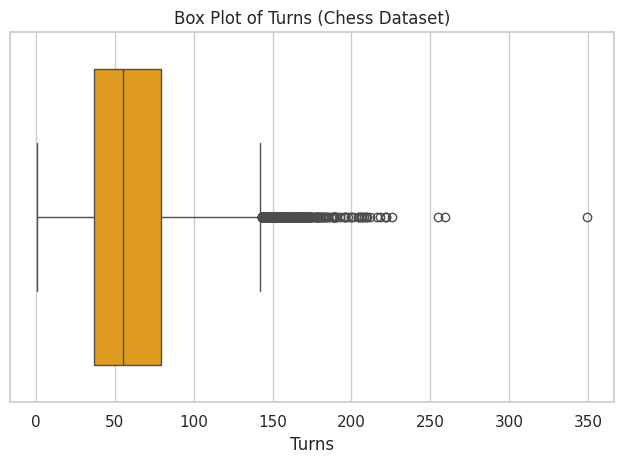

In [83]:
sns.boxplot(x=chess["turns"], color="orange")
plt.title("Box Plot of Turns (Chess Dataset)")
plt.xlabel("Turns")
plt.tight_layout()
plt.show()

Victory Status Distribution

<ipython-input-84-5d94b654fdb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=chess, x='victory_status', palette='Set2')


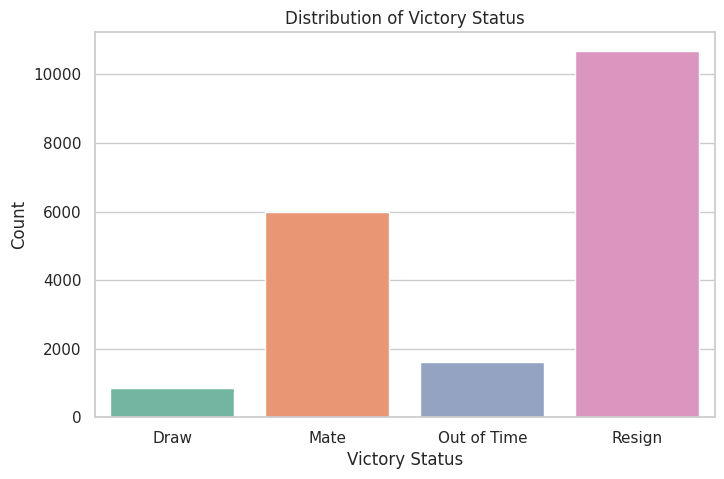

In [84]:
plt.figure(figsize=(8, 5))
sns.countplot(data=chess, x='victory_status', palette='Set2')
plt.title('Distribution of Victory Status')
plt.xlabel('Victory Status')
plt.ylabel('Count')
plt.show()

Opening Popularity

<ipython-input-85-a43458a9234f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.values, y=top_openings.index, palette='coolwarm')


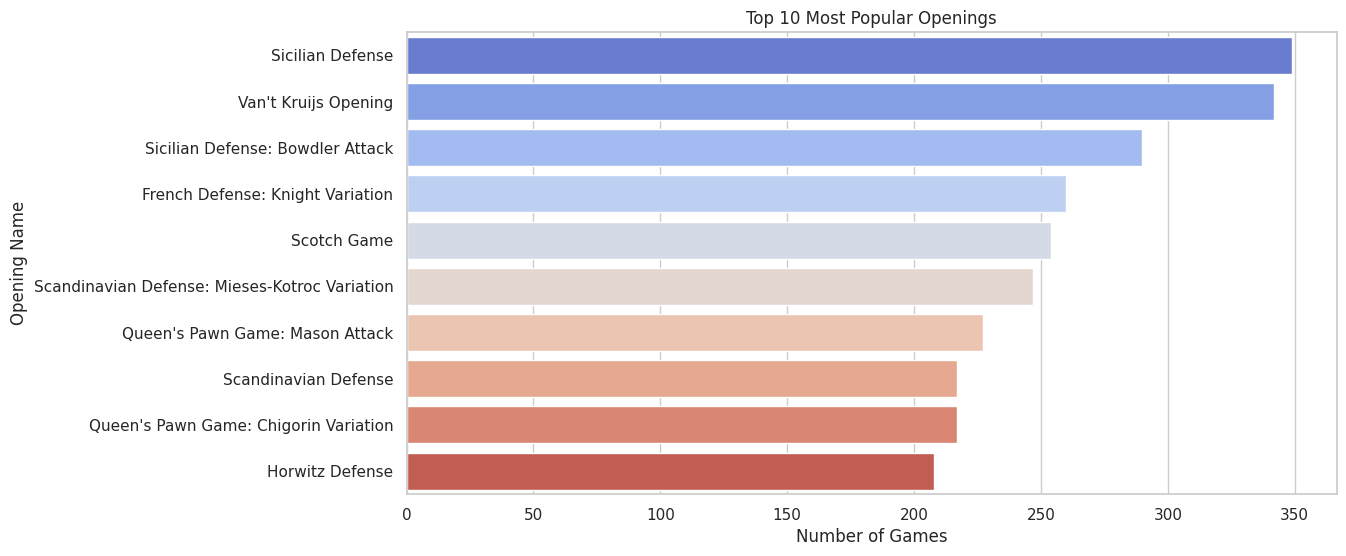

In [85]:
top_openings = chess['opening_fullname'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_openings.values, y=top_openings.index, palette='coolwarm')
plt.title('Top 10 Most Popular Openings')
plt.xlabel('Number of Games')
plt.ylabel('Opening Name')
plt.show()

two variable and Multivariable dataplots

 Distribution of Ratings

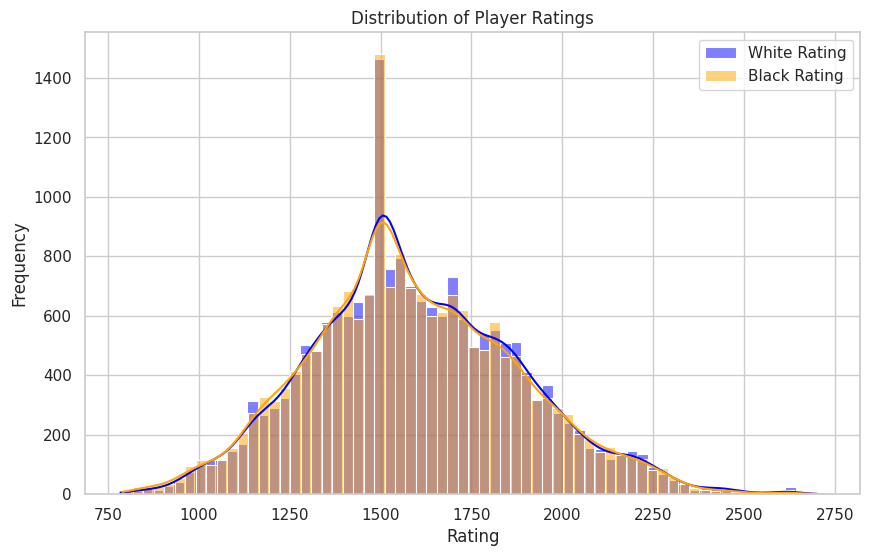

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(chess['white_rating'], kde=True, color='blue', label='White Rating')
sns.histplot(chess['black_rating'], kde=True, color='orange', label='Black Rating')
plt.title('Distribution of Player Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 Winner by Rating Difference

<ipython-input-87-767cf8360fe2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=chess, x='winner', y='rating_difference', palette='muted')


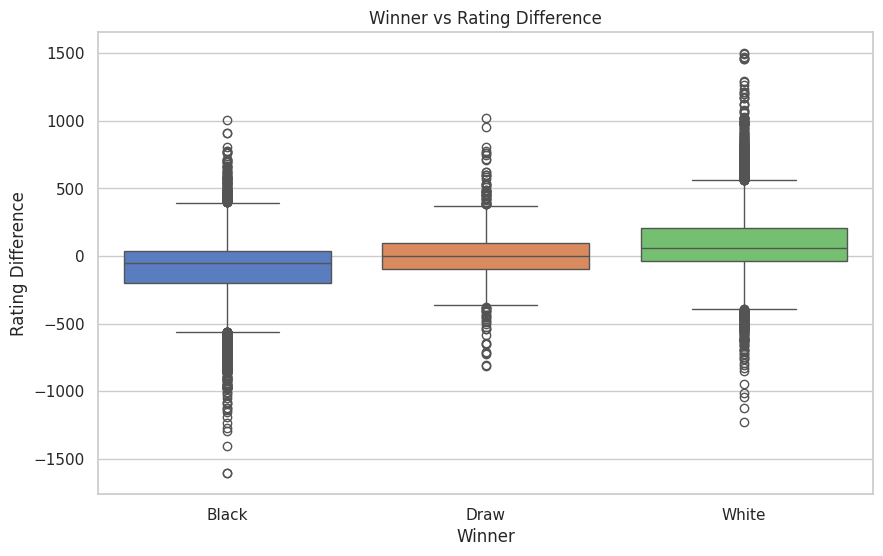

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=chess, x='winner', y='rating_difference', palette='muted')
plt.title('Winner vs Rating Difference')
plt.xlabel('Winner')
plt.ylabel('Rating Difference')
plt.show()

Relationship between rating and other numerical features

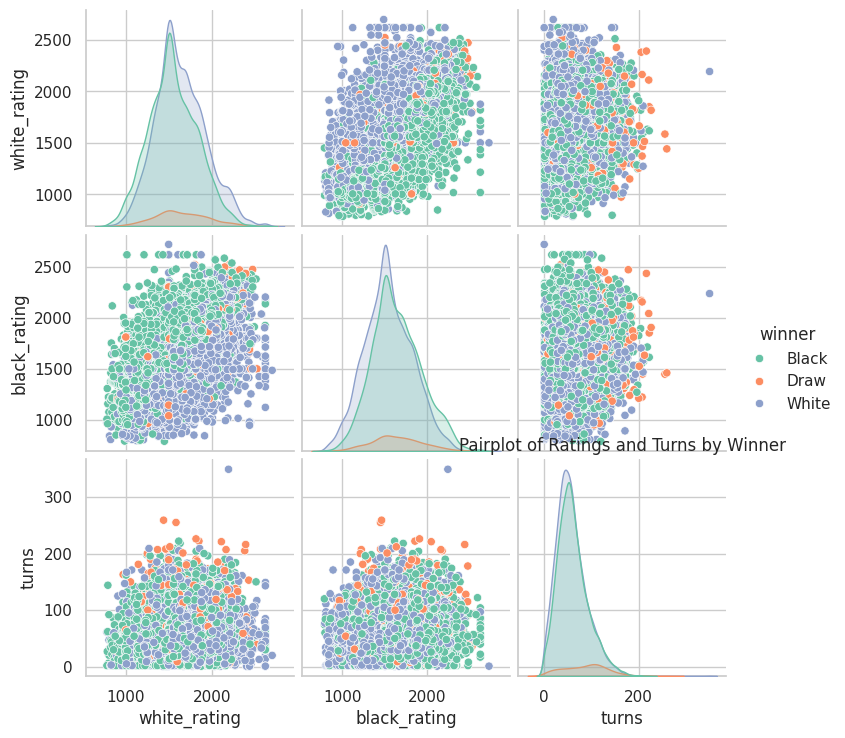

In [88]:
sns.pairplot(chess, vars=['white_rating', 'black_rating', 'turns'], hue='winner', palette='Set2')
plt.title('Pairplot of Ratings and Turns by Winner')
plt.show()

##Power consumption dataset

Single variable

Time Series Plot of Power Consumption (Zone 1,2,3)

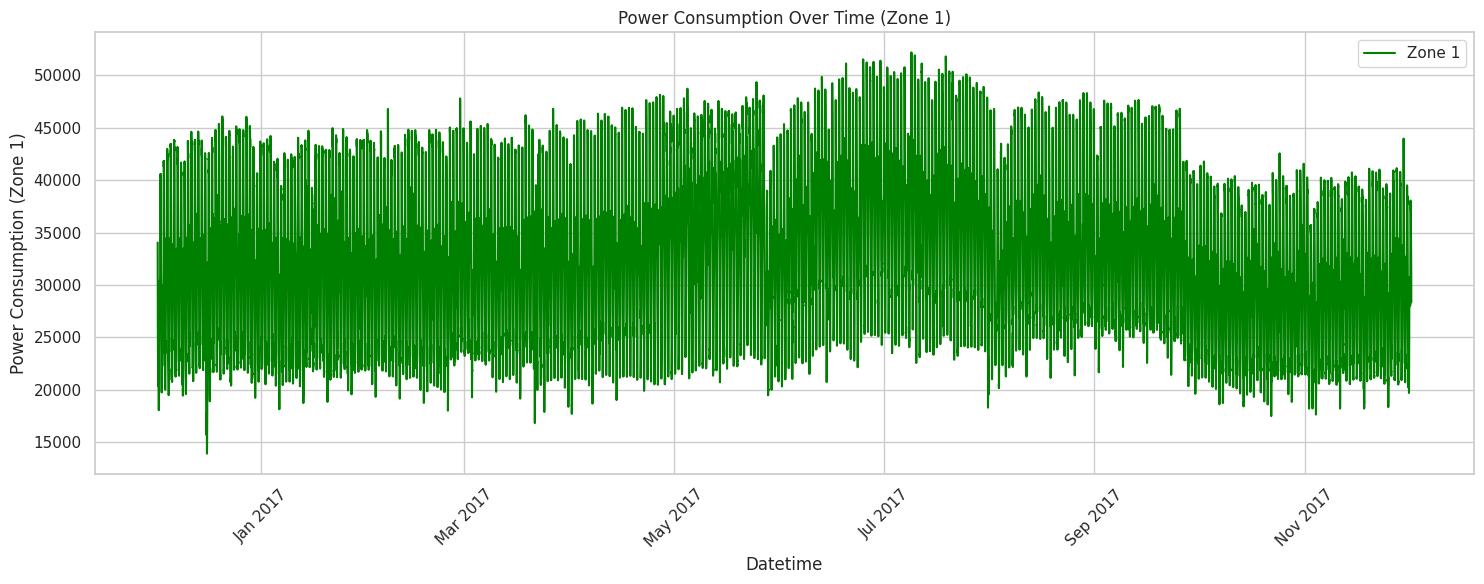

In [89]:
plt.figure(figsize=(15, 6))
plt.plot(power.index, power['PowerConsumption_Zone1'], label='Zone 1', color='green')
plt.title('Power Consumption Over Time (Zone 1)')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (Zone 1)')
plt.legend()

two_month_ticks = pd.date_range(start=power.index.min(), end=power.index.max(), freq="2ME")
plt.xticks(two_month_ticks, [tick.strftime("%b %Y") for tick in two_month_ticks], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-90-db34617e01cd>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  two_month_ticks = pd.date_range(start=power.index.min(), end=power.index.max(), freq="2M")


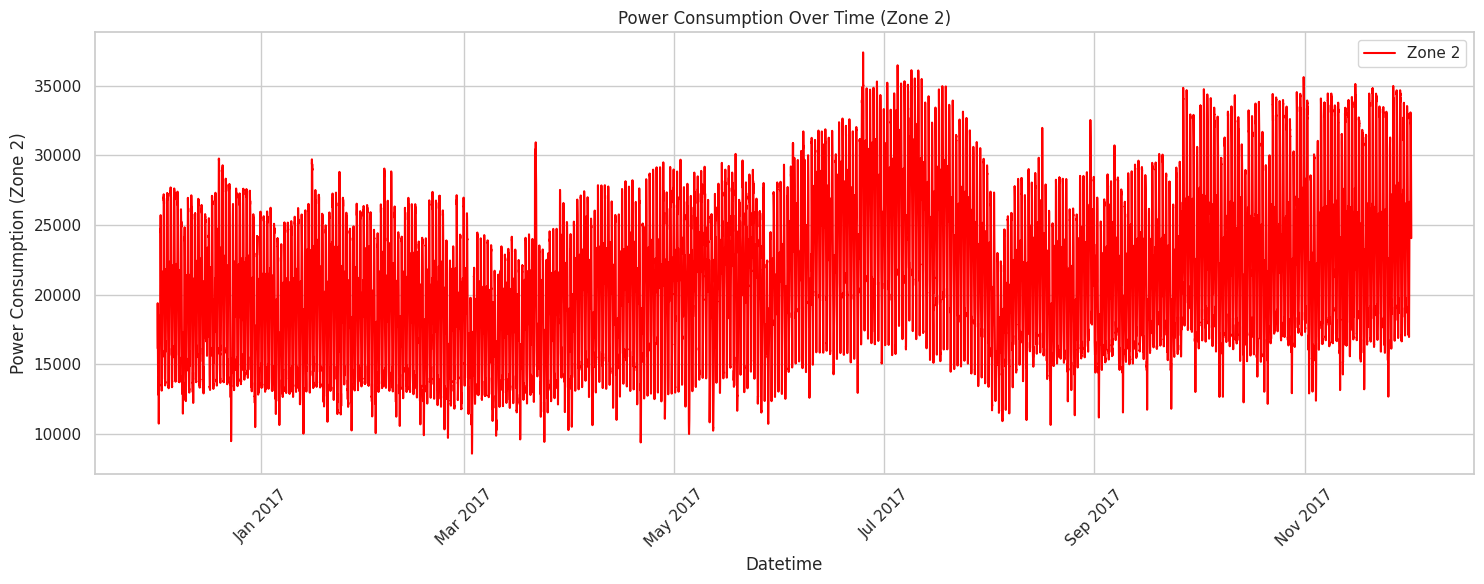

In [90]:
plt.figure(figsize=(15, 6))
plt.plot(power.index, power['PowerConsumption_Zone2'], label='Zone 2', color='red')
plt.title('Power Consumption Over Time (Zone 2)')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (Zone 2)')
plt.legend()

two_month_ticks = pd.date_range(start=power.index.min(), end=power.index.max(), freq="2M")
plt.xticks(two_month_ticks, [tick.strftime("%b %Y") for tick in two_month_ticks], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-91-402cf601c117>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  two_month_ticks = pd.date_range(start=power.index.min(), end=power.index.max(), freq="2M")


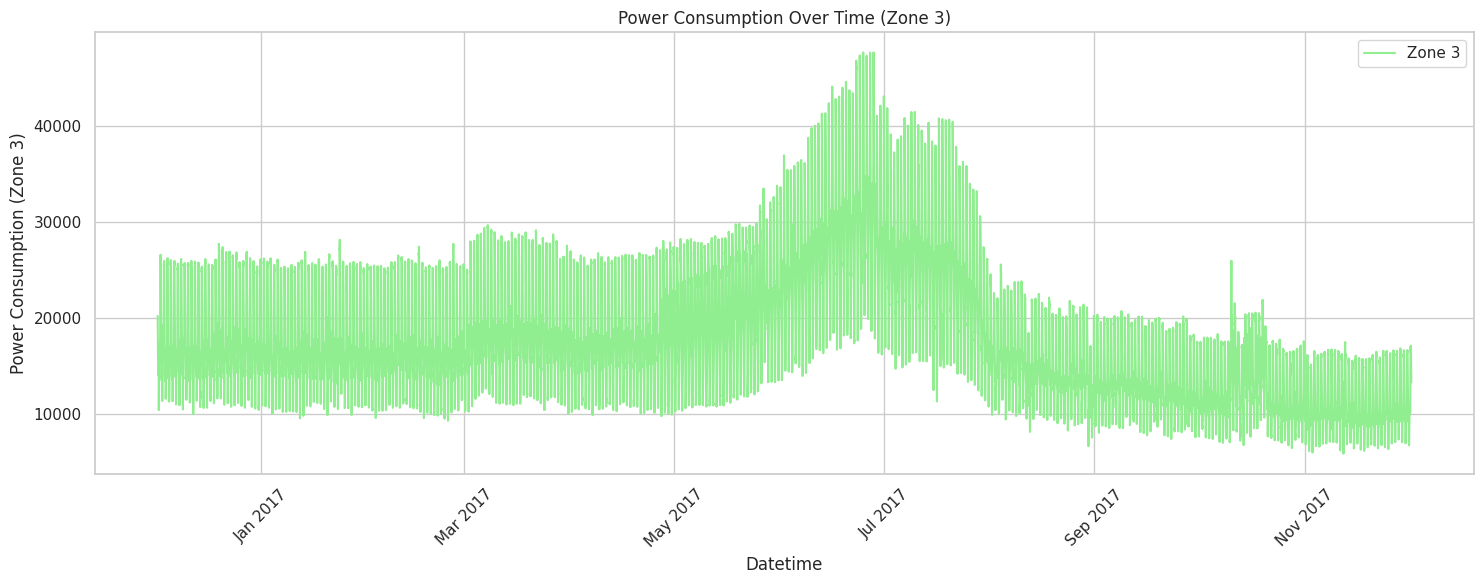

In [91]:
plt.figure(figsize=(15, 6))
plt.plot(power.index, power['PowerConsumption_Zone3'], label='Zone 3', color='lightgreen')
plt.title('Power Consumption Over Time (Zone 3)')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (Zone 3)')
plt.legend()

two_month_ticks = pd.date_range(start=power.index.min(), end=power.index.max(), freq="2M")
plt.xticks(two_month_ticks, [tick.strftime("%b %Y") for tick in two_month_ticks], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


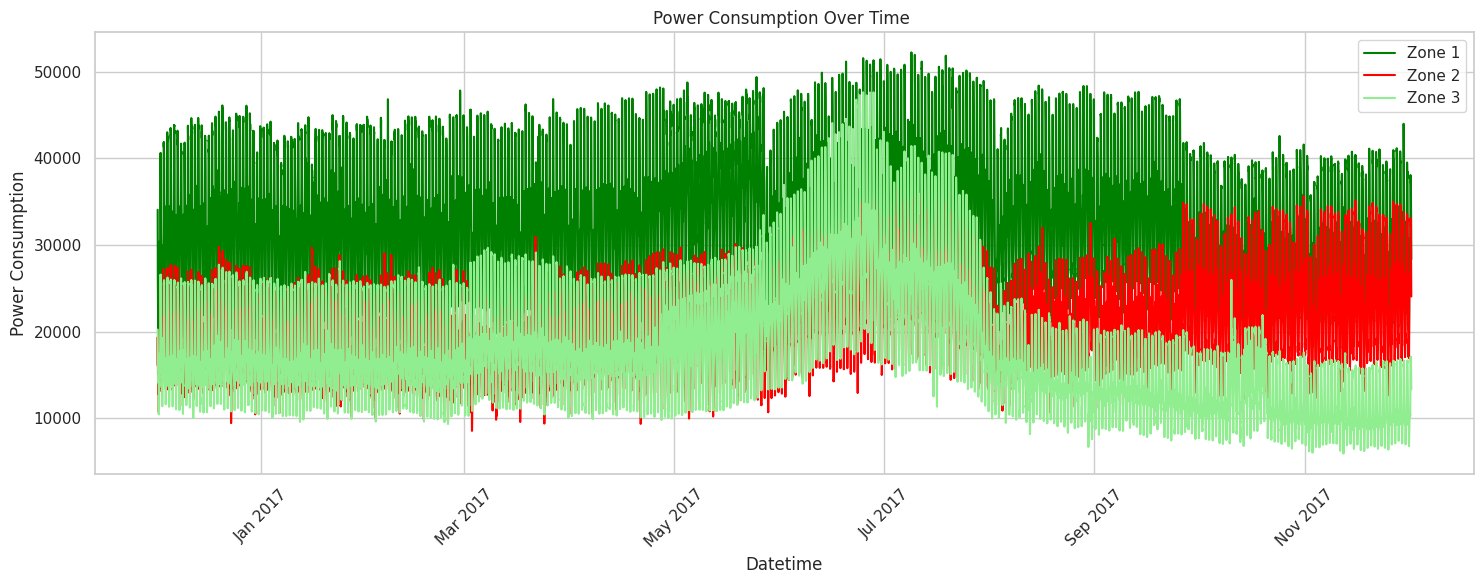

In [92]:
plt.figure(figsize=(15, 6))
plt.plot(power.index, power['PowerConsumption_Zone1'], label='Zone 1', color='green')
plt.plot(power.index, power['PowerConsumption_Zone2'], label='Zone 2', color='red')
plt.plot(power.index, power['PowerConsumption_Zone3'], label='Zone 3', color='lightgreen')
plt.title('Power Consumption Over Time ')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.legend()

two_month_ticks = pd.date_range(start=power.index.min(), end=power.index.max(), freq="2ME")
plt.xticks(two_month_ticks, [tick.strftime("%b %Y") for tick in two_month_ticks], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

Histogram for Temperature

Text(0, 0.5, 'Frequency')

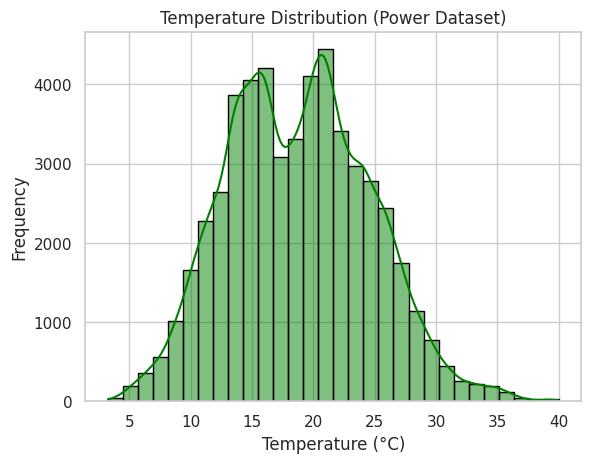

In [93]:
sns.histplot(power["Temperature"], kde=True, color="green", bins=30, edgecolor="black")
plt.title("Temperature Distribution (Power Dataset)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")

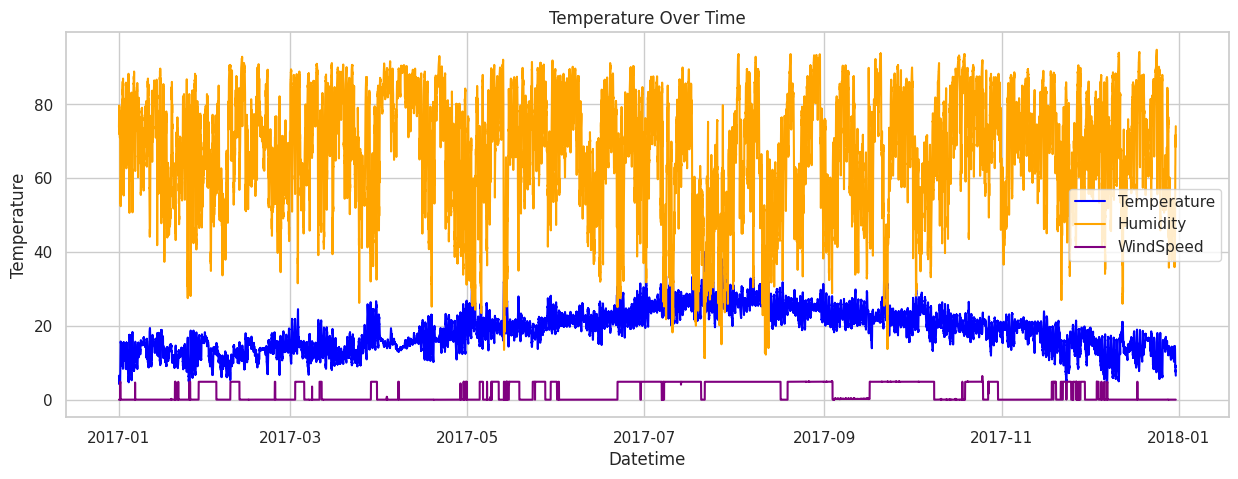

In [94]:
plt.figure(figsize=(15, 5))
plt.plot(power.index, power['Temperature'], label='Temperature', color='blue')
plt.plot(power.index, power['Humidity'], label='Humidity', color='orange')
plt.plot(power.index, power['WindSpeed'], label='WindSpeed', color='purple')

plt.title('Temperature Over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.legend()
plt.show()

Distribution of power consumption by month

<ipython-input-95-b318d9efd016>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=power, x='Month', y='PowerConsumption_Zone1', palette='coolwarm')


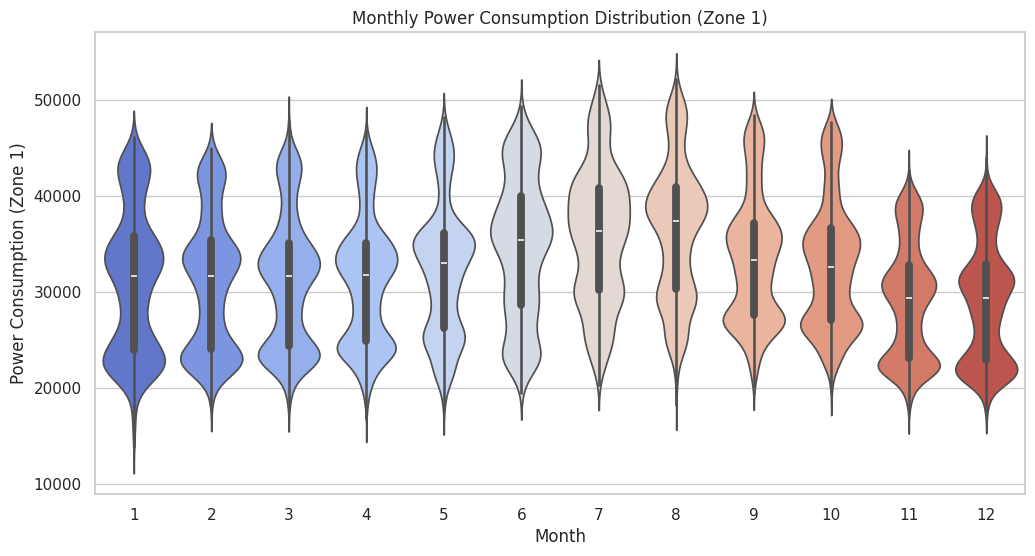

In [95]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=power, x='Month', y='PowerConsumption_Zone1', palette='coolwarm')
plt.title('Monthly Power Consumption Distribution (Zone 1)')
plt.xlabel('Month')
plt.ylabel('Power Consumption (Zone 1)')
plt.show()

<ipython-input-96-f1557c7fa5dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=power, x='Month', y='PowerConsumption_Zone2', palette='coolwarm')


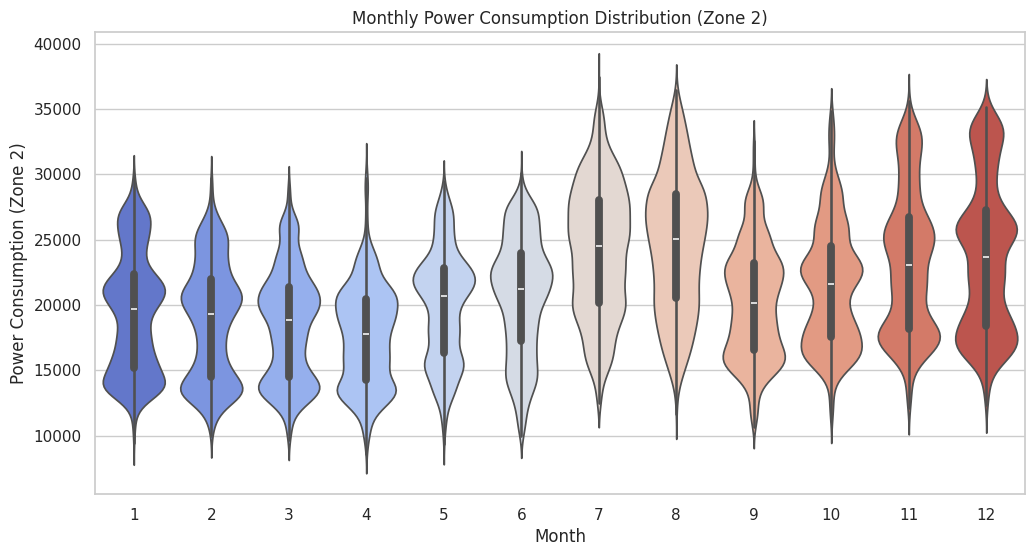

In [96]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=power, x='Month', y='PowerConsumption_Zone2', palette='coolwarm')
plt.title('Monthly Power Consumption Distribution (Zone 2)')
plt.xlabel('Month')
plt.ylabel('Power Consumption (Zone 2)')
plt.show()

<ipython-input-97-d4e2595e332c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=power, x='Month', y='PowerConsumption_Zone3', palette='coolwarm')


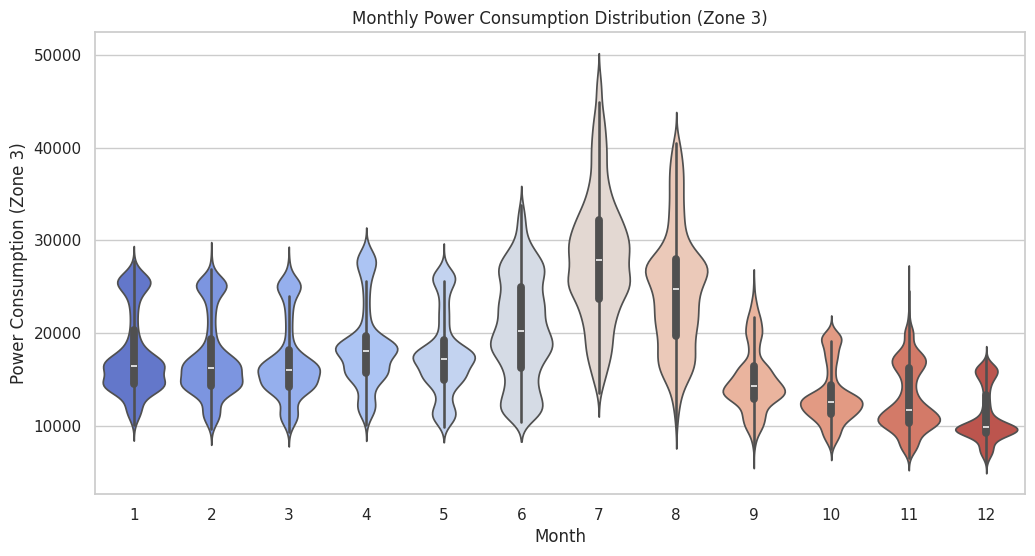

In [97]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=power, x='Month', y='PowerConsumption_Zone3', palette='coolwarm')
plt.title('Monthly Power Consumption Distribution (Zone 3)')
plt.xlabel('Month')
plt.ylabel('Power Consumption (Zone 3)')
plt.show()

two variable and multivariable

Heatmap of Correlation

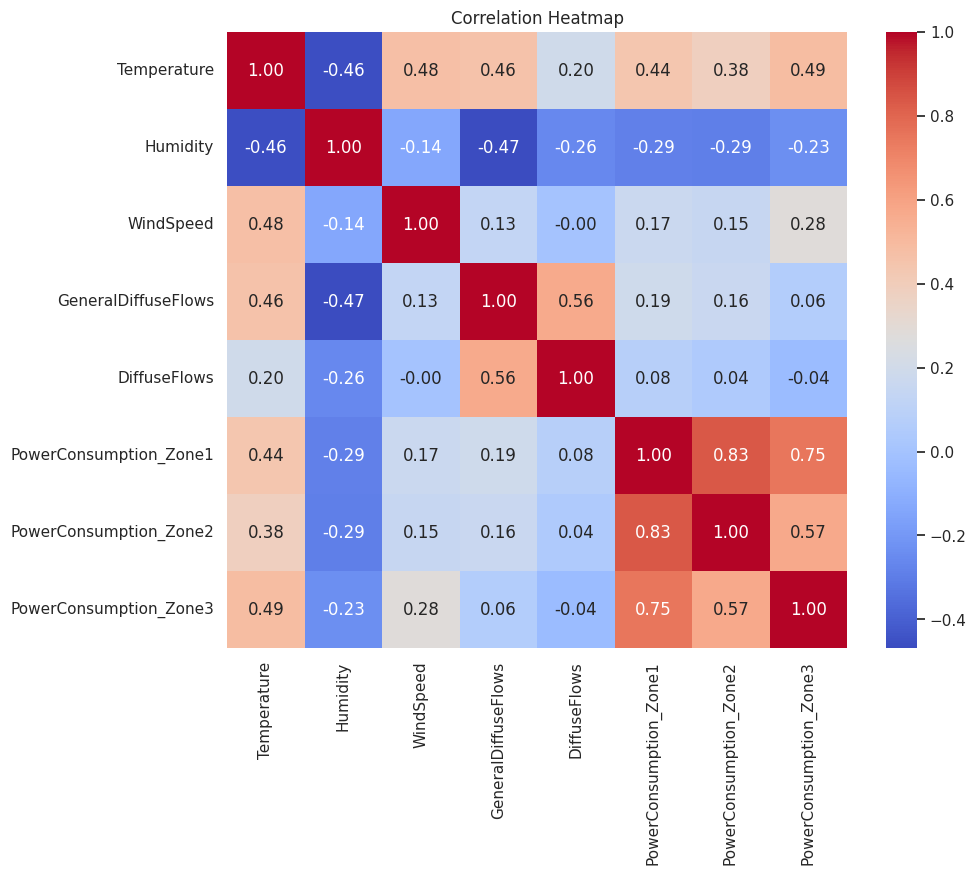

In [98]:
plt.figure(figsize=(10, 8))
corr_matrix = power[['Temperature', 'Humidity', 'WindSpeed','GeneralDiffuseFlows', 'DiffuseFlows','PowerConsumption_Zone1', 'PowerConsumption_Zone2','PowerConsumption_Zone3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Distribution of Power Consumption Across Zones

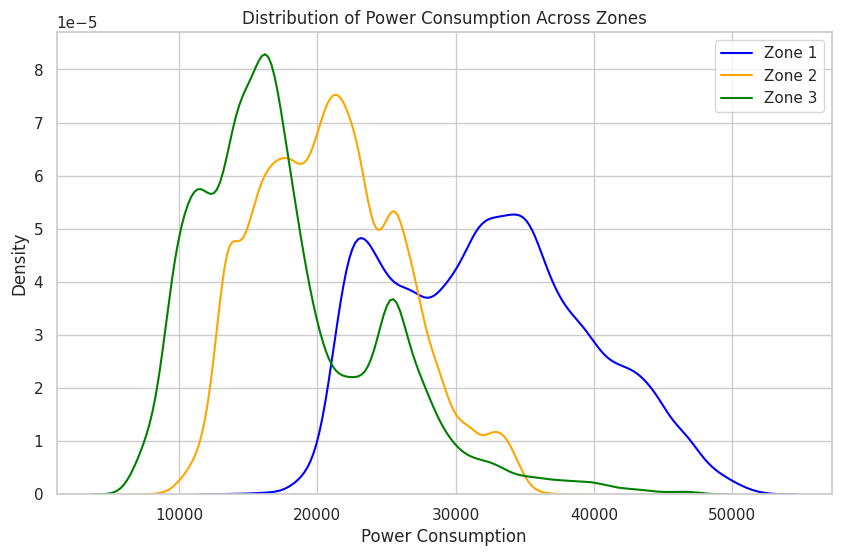

In [99]:
plt.figure(figsize=(10, 6))
sns.kdeplot(power['PowerConsumption_Zone1'], label='Zone 1', color='blue')
sns.kdeplot(power['PowerConsumption_Zone2'], label='Zone 2', color='orange')
sns.kdeplot(power['PowerConsumption_Zone3'], label='Zone 3', color='green')
plt.title('Distribution of Power Consumption Across Zones')
plt.xlabel('Power Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()

Time-Series Decomposition

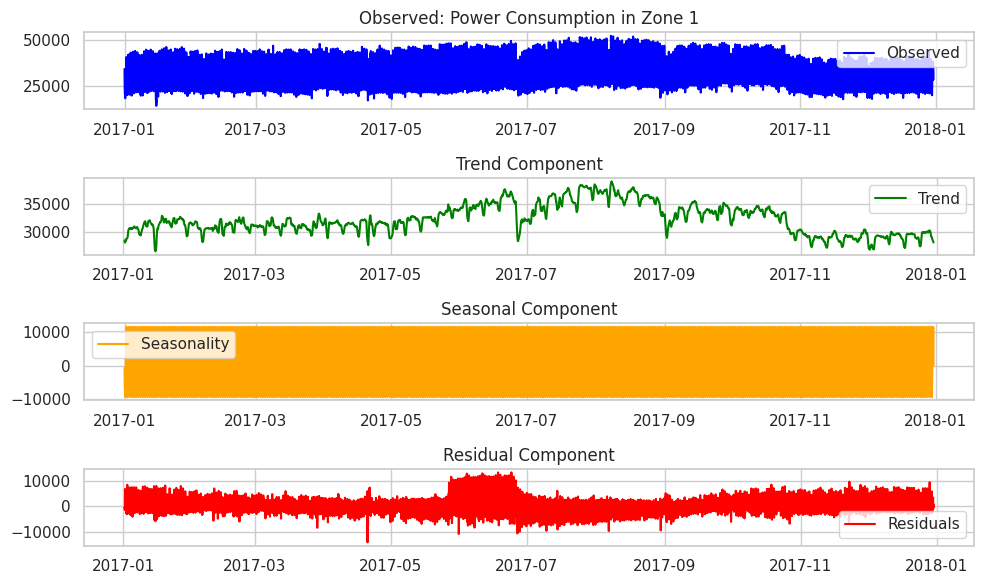

In [100]:
decomposition = seasonal_decompose(
    power['PowerConsumption_Zone1'],
    model='additive',
    period=144  # Assumes 144 10-minute intervals = 1 day
)

plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed: Power Consumption in Zone 1')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


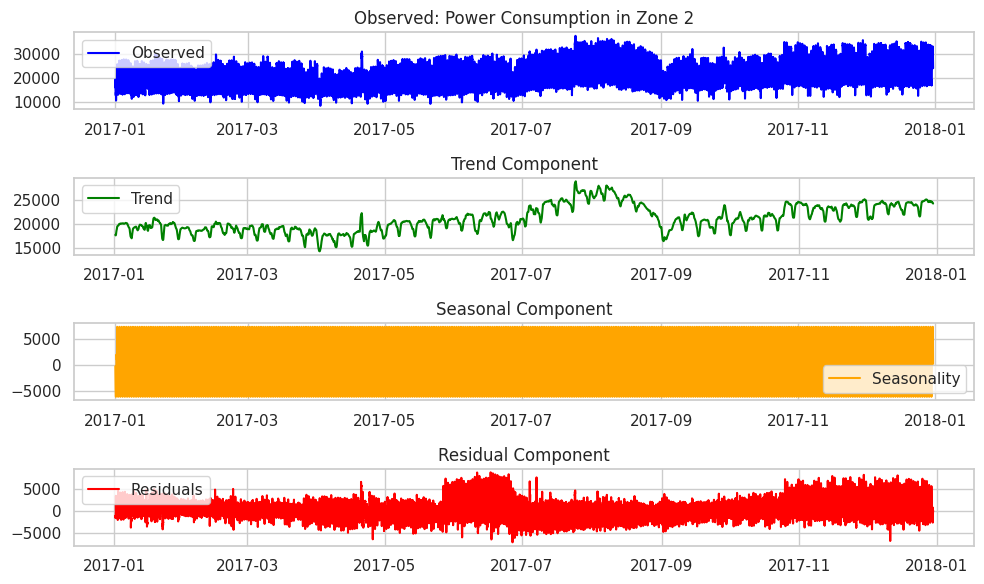

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(
    power['PowerConsumption_Zone2'],
    model='additive',
    period=144  # Assumes 144 10-minute intervals = 1 day
)

# Plot each component individually
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed: Power Consumption in Zone 2')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


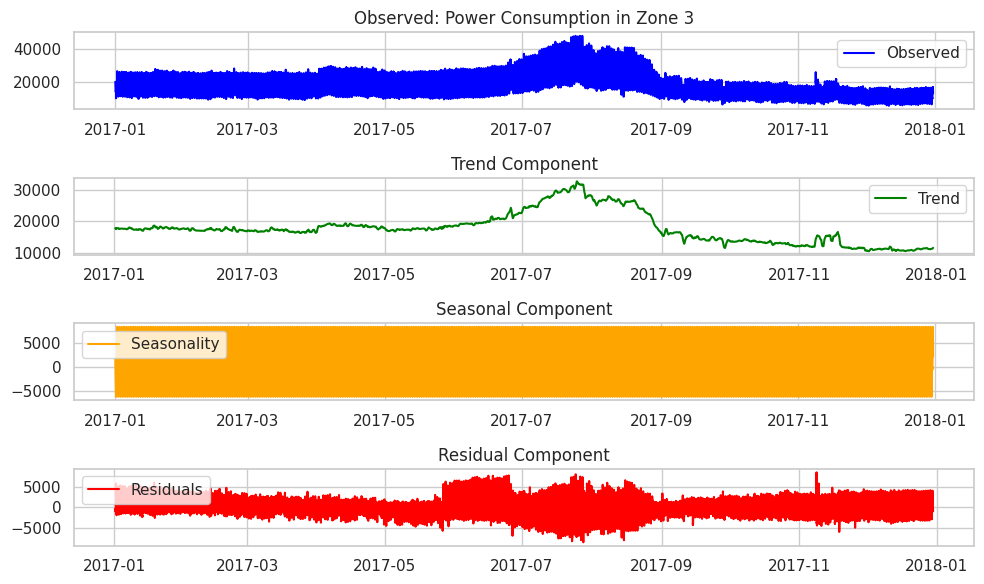

In [102]:
decomposition = seasonal_decompose(
    power['PowerConsumption_Zone3'],
    model='additive',
    period=144  # Assumes 144 10-minute intervals = 1 day
)

# Plot each component individually
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed: Power Consumption in Zone 3')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


Cluster Analysis

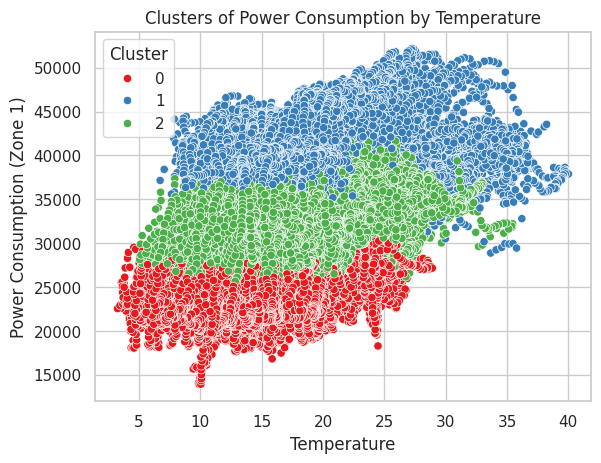

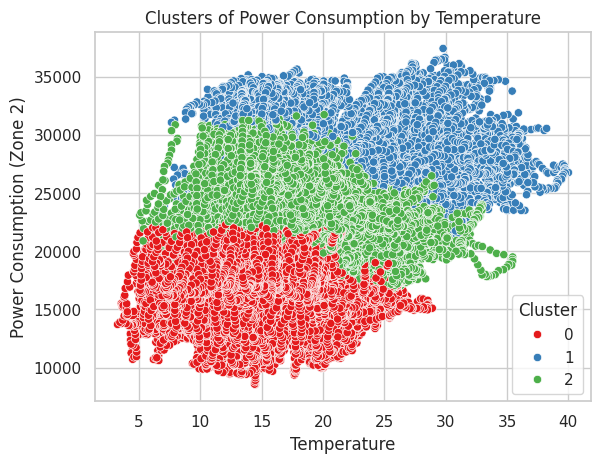

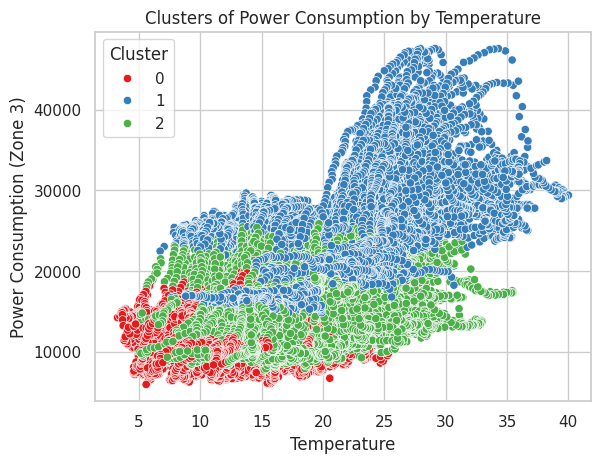

In [103]:
features = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(power[features])

kmeans = KMeans(n_clusters=3, random_state=42)
power['Cluster'] = kmeans.fit_predict(scaled_data)

sns.scatterplot(data=power, x='Temperature', y='PowerConsumption_Zone1', hue='Cluster', palette='Set1')
plt.title('Clusters of Power Consumption by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption (Zone 1)')
plt.show()

sns.scatterplot(data=power, x='Temperature', y='PowerConsumption_Zone2', hue='Cluster', palette='Set1')
plt.title('Clusters of Power Consumption by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption (Zone 2)')
plt.show()

sns.scatterplot(data=power, x='Temperature', y='PowerConsumption_Zone3', hue='Cluster', palette='Set1')
plt.title('Clusters of Power Consumption by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption (Zone 3)')
plt.show()

Other plots

Heatmap of Missing Data

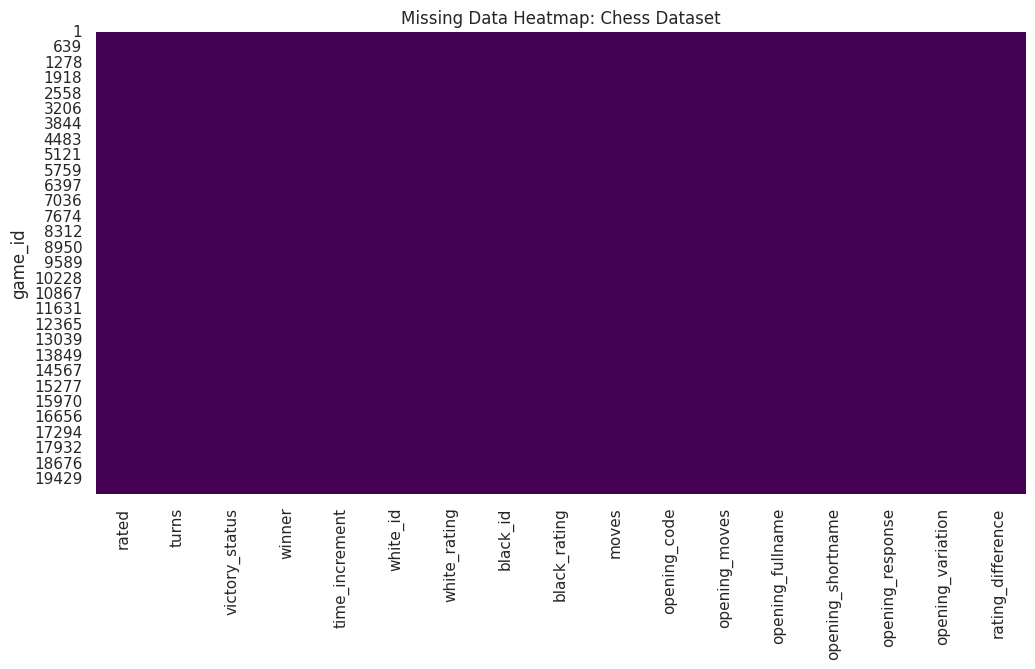

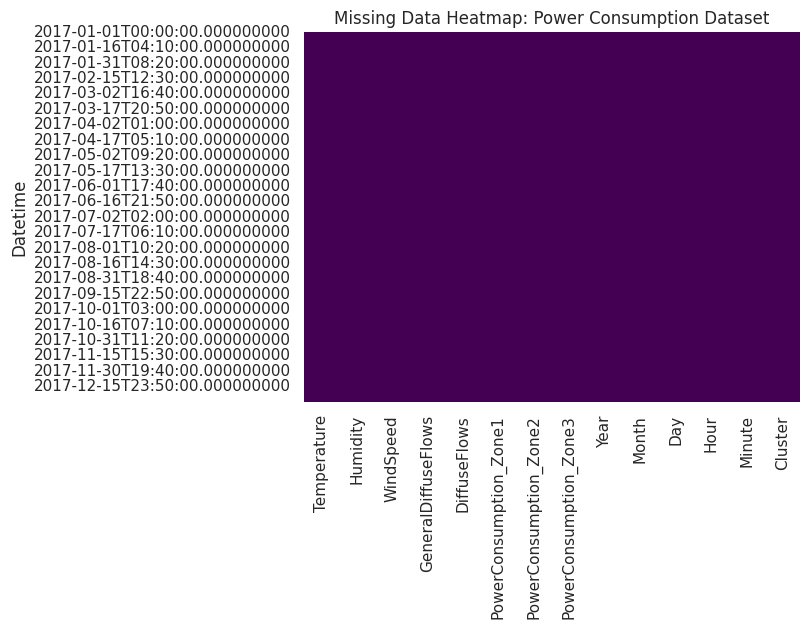

In [104]:
plt.figure(figsize=(12, 6))
sns.heatmap(chess.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap: Chess Dataset')
plt.show()

sns.heatmap(power.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap: Power Consumption Dataset')
plt.show()

3D Scatter Plot

In [105]:
fig = px.scatter_3d(power, x='Temperature', y='Humidity', z='PowerConsumption_Zone1',color='WindSpeed', title='3D Scatter Plot: Temperature vs Humidity vs Power Consumption')
fig.show()

In [106]:
fig = px.scatter_3d(power, x='Temperature', y='Humidity', z='PowerConsumption_Zone2',color='WindSpeed', title='3D Scatter Plot: Temperature vs Humidity vs Power Consumption')
fig.show()

In [107]:
fig = px.scatter_3d(power, x='Temperature', y='Humidity', z='PowerConsumption_Zone3',color='WindSpeed', title='3D Scatter Plot: Temperature vs Humidity vs Power Consumption')
fig.show()

#Write your inference by comparing both Non-Graphical techniques Graphical techniques